## Periodogramas y Espectogramas

Se presentan las gráficas respectivas para cada uno de los atractores, sus periodogramas y espectrogramas

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from scipy import signal

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
##---- Serie de tiempo a partir de ecuaciones diferenciales
def Lorentz_eq2(r, t, rho, sigma, beta): #Atractor de Lorentz
    x, y, z = r
    
    dx = sigma*(y-x)
    dy = x*(rho-z) -y
    dz = x*y - beta*z
    
    return np.array([dx, dy, dz])

def Duffing(r, t, e, g, w): #Oscilador de Duffing 
    x, y, z = r
    
    dx = y
    dy = x - x**3 - e*y +g*np.cos(z)
    dz = w
    
    return np.array([dx, dy, dz])

def VderP2(r, t, A, T2): #Ecuacion de Van der Pol con forzamiento 
    x, y, z = r
    
    dx = y
    dy = (1-x**2)*y - x + A*np.cos(2*np.pi*z)
    dz = 1/T2
    
    return np.array([dx, dy, dz])

def Chua_Circuit(r, t, a, b, m0, m1): # Circuito de Chua
    x, y, z = r
    
    if x >= 1:
        dx = a*(y - m1*x - (m0-m1))
    elif x <= -1:
        dx = a*(y - m1*x + (m0-m1))
    else:
        dx = a*(y - m0*x)
        
    dy = x - y + z
    dz = -b*y
    
    return np.array([dx, dy, dz])

In [23]:
##----- Solución númerica, transformada de fourier
##----- periodograma y espectograma

def frequencies(f, r0, time, param, Fs):
    '''Inputs: funcion con ecuaciones diff, initial conditions, time array
    parameters in tuple, fs
    Outputs: Graphics
    '''
    #numerical solution
    sol = odeint(f, r0, time, args=param)
    x = sol[:,0]; y = sol[:,1]; z = sol[:,2]
    
    fig1 = plt.figure(figsize=(6, 6))
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.plot(x, y, z, 'c-')
    ax1.set_xlabel("x(t)"); ax1.set_ylabel("y(t)"); ax1.set_zlabel("z(t)")
    
    #Fourier transform
    freq = np.fft.fftfreq(time.shape[-1])
    sp_x = np.fft.fft(x); sp_y = np.fft.fft(y); sp_z = np.fft.fft(z)
    
    fig2 = plt.figure(figsize(6, 8))
    ax02 = fig2.add_subplot(311); ax12 = fig2.add_subplot(312); ax22 = fig2.add_subplot(313)
    ax02.plot(freq, sp_x.real); ax12.plot(freq, sp_y.real); ax22.plot(freq, sp_z.real)
    ax02.set_xlim(-0.05, 0.05); ax12.set_xlim(-0.05, 0.05); ax22.set_xlim(-0.05, 0.05)
    
    #periodogram
    ff_periodx, Spect_denx = signal.periodogram(x, fs=Fs)
    ff_periody, Spect_deny = signal.periodogram(y, fs=Fs)
    ff_periodz, Spect_denz = signal.periodogram(z, fs=Fs)

    fig3 = plt.figure(figsize(6, 8))
    ax03 = fig3.add_subplot(311); ax13 = fig3.add_subplot(312); ax23 = fig3.add_subplot(313)
    ax03.semilogy(ff_periodx, Spect_denx); ax13.semilogy(ff_periody, Spect_deny); ax23.semilogy(ff_periodz, Spect_denz)
    
    #Spectogram
    fqx_spect, tx_spect, Spectx = signal.spectrogram(x, Fs)
    fqy_spect, ty_spect, Specty = signal.spectrogram(y, Fs)
    fqz_spect, tz_spect, Spectz = signal.spectrogram(z, Fs)
    
    fig4 = plt.figure(figsize=(6, 8))
    ax04 = fig4.add_subplot(311); ax14 = fig4.add_subplot(312); ax24 = fig4.add_subplot(313)
    ax04.pcolormesh(tx_spect, fqx_spect, Spectx); ax04.set_ylim(0, 40)
    ax14.pcolormesh(ty_spect, fqy_spect, Specty); ax14.set_ylim(0, 40)
    ax24.pcolormesh(tz_spect, fqz_spect, Spectz); ax24.set_ylim(0, 40)
    
    plt.show()
    a = 'everything done'
    
    return a

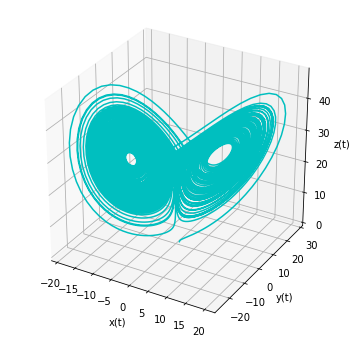

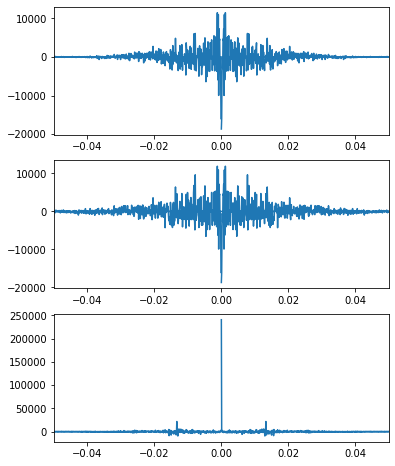

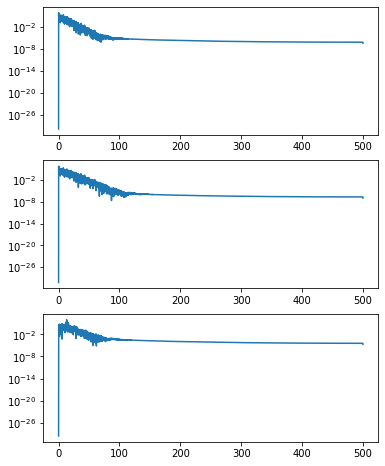

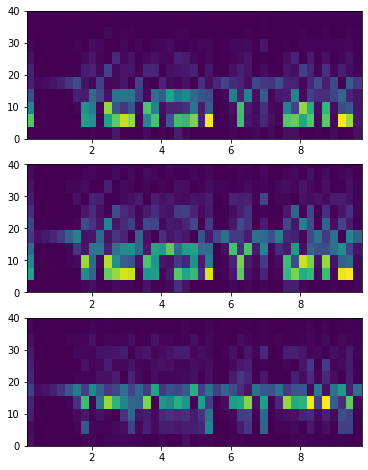

'everything done'

In [41]:
#------- Sistema de Lorentz 
rho, sigma, beta = 28, 10, 8./3.
p = (rho, sigma, beta)
t = np.arange(0, 100, 0.01)
rr0 = np.array([1, 0, 0])

frequencies(Lorentz_eq2, rr0, t, p, 1e3)

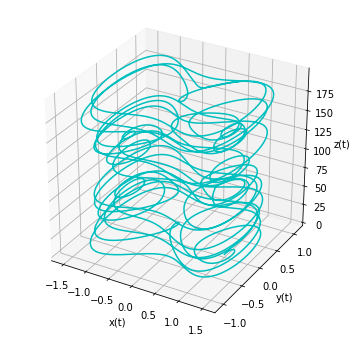

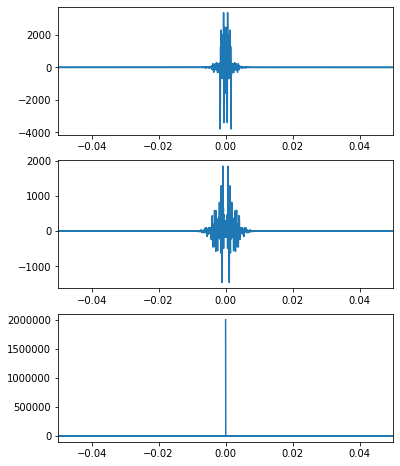

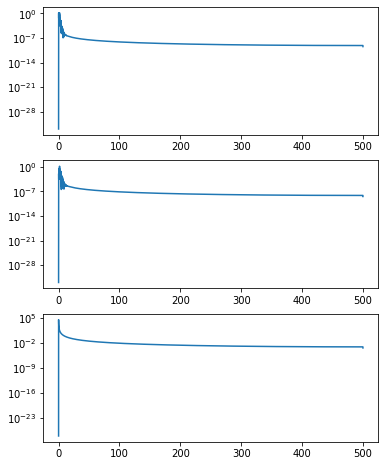

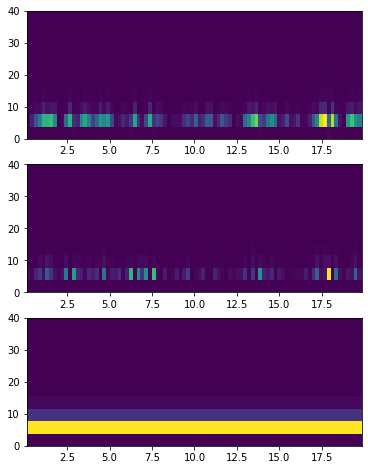

'everything done'

In [42]:
#------- Sistema de Duffing a
epsilon, gamma, omega = 0.15, 0.3, 1
p_duff = (epsilon, gamma, omega)
t_duff = np.arange(0, 200, 0.01)
rr0_duff = np.array([1, 0, 0])

frequencies(Duffing, rr0_duff, t_duff, p_duff, 1e3)

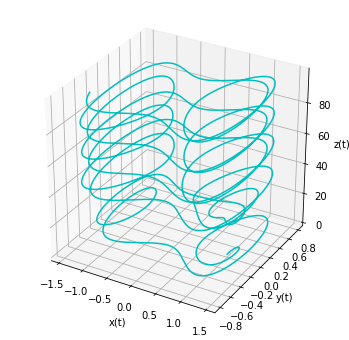

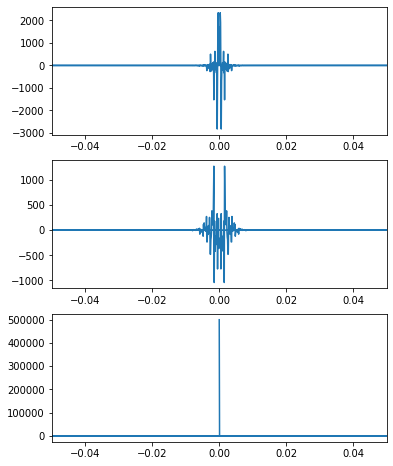

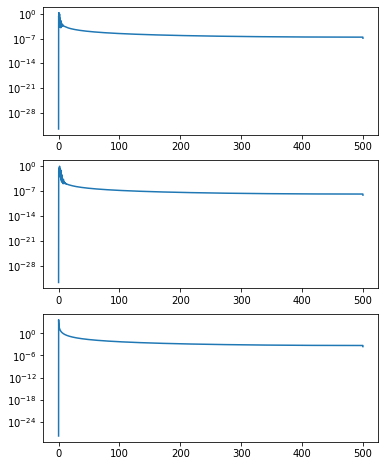

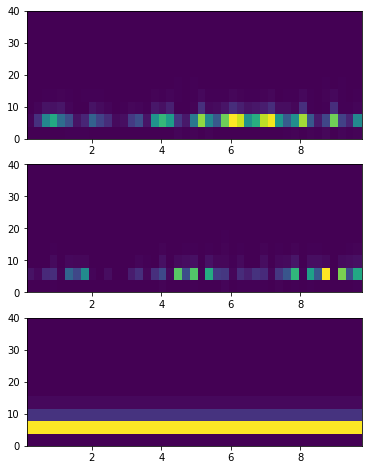

'everything done'

In [28]:
##------- Duffing b
epsilon, gamma, omega = 0.22, 0.3, 1
p_duff = (epsilon, gamma, omega)
t_duff = np.arange(0, 200, 0.01)
rr0_duff = np.array([1, 0, 0])

frequencies(Duffing, rr0_duff, t_duff, p_duff, 1e3)

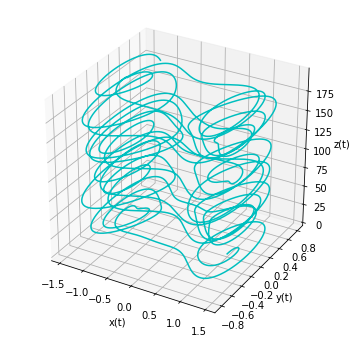

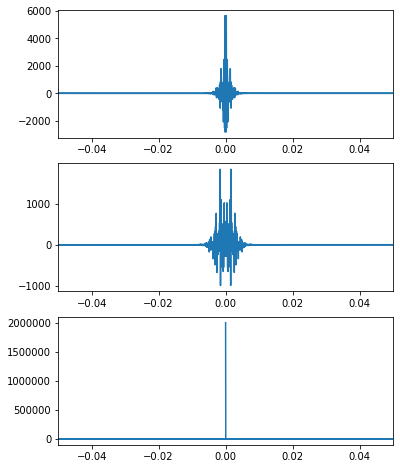

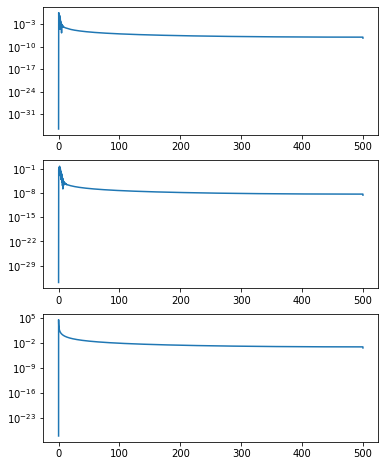

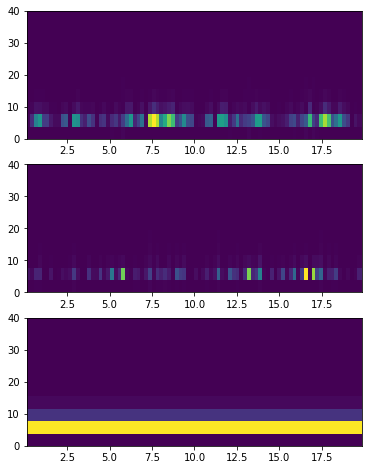

'everything done'

In [43]:
##------ Duffing c
epsilon, gamma, omega = 0.25, 0.3, 1.0
p_duff = (epsilon, gamma, omega)
t_duff = np.arange(0, 200, 0.01)
rr0_duff = np.array([1, 0, 0])

frequencies(Duffing, rr0_duff, t_duff, p_duff, 1e3)

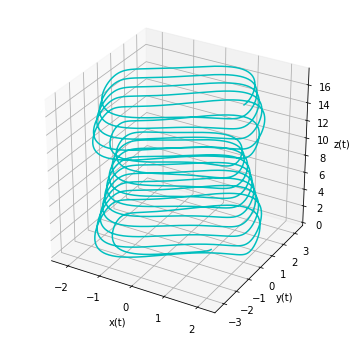

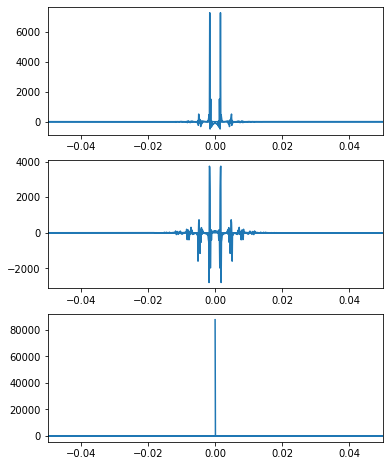

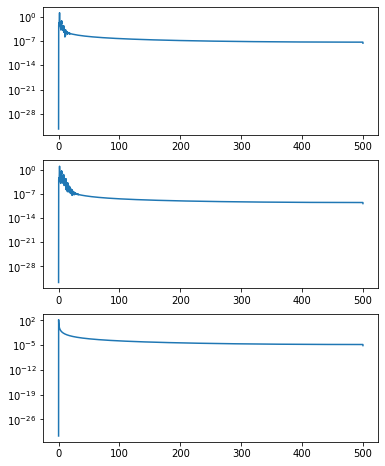

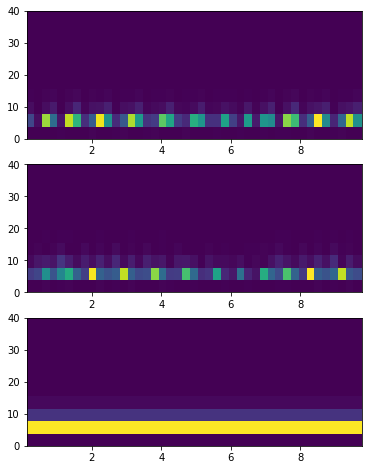

'everything done'

In [34]:
##------ Van der Pol
A, T2 = 0.5, 2*np.pi/1.1
p = (A, T2)
t = np.arange(0, 100, 0.01)
rr0 = np.array([1, 0, 0])

frequencies(VderP2, rr0, t, p, 1e3)

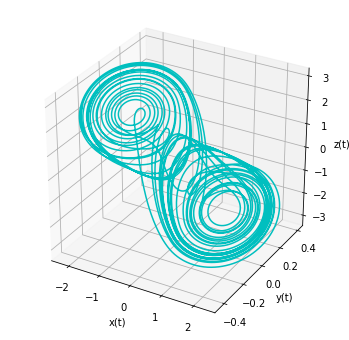

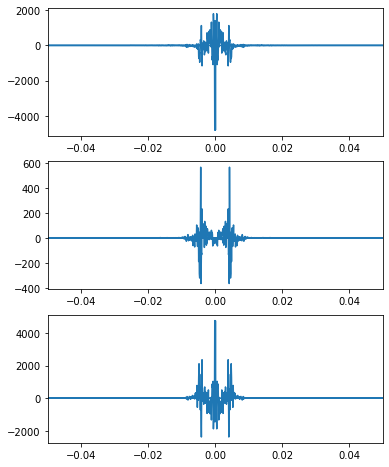

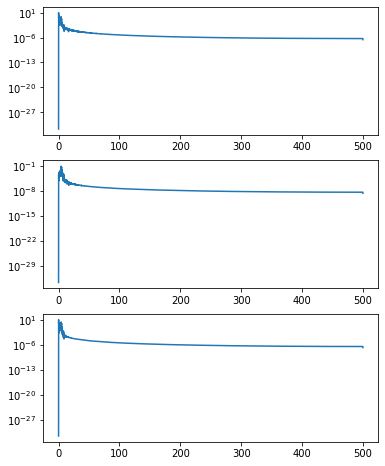

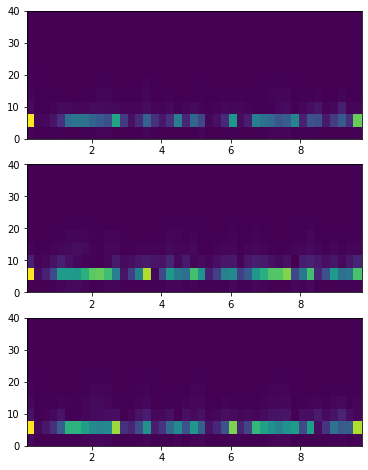

'everything done'

In [40]:
##----- Circuito de Chua
a, b, m0, m1 = 9, 100/7, -1/7, 2/7
p=(a, b, m0, m1)

t = np.arange(0, 100, 0.01)
rr0 = np.array([1, 0, 0])

frequencies(Chua_Circuit, rr0, t, p, 1e3)